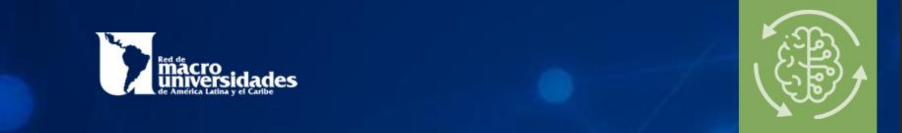


---
<center>

💻 **INTELIGENCIA ARTIFICIAL**

</center>


---

Israel Martinez

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import os
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.zip to data.zip


In [ ]:
!pwd


/content


In [ ]:
import zipfile
import io
data = zipfile.ZipFile (io.BytesIO(uploaded["data.zip"]),"r")
data.extractall()

In [ ]:
train_path = "/content/data/CatsvsDogs/train"
test_path = "/content/data/CatsvsDogs/test"
valid_path = "/content/data/CatsvsDogs/valid"

In [ ]:
train_batches = ImageDataGenerator(rescale = 1./255, shear_range = 0.3 , zoom_range = 0.3, horizontal_flip = True).flow_from_directory (directory = train_path, target_size = (224,224), classes = ["cat","dog"], class_mode = "categorical", batch_size = 10)
test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory (directory = test_path, target_size  = (224,224), classes = ["cat","dog"], batch_size = 10, shuffle = False)
valid_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory (directory = valid_path, target_size  = (224,224), classes = ["cat","dog"],class_mode = "categorical", batch_size = 10)

Found 1000 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
imgs, labels = next (train_batches)


In [ ]:
def plotImages (images_arr):
    fig, axes = plt.subplots (1,10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip (images_arr,axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

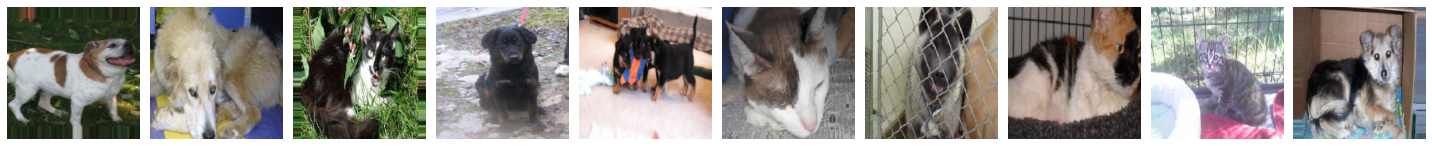

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
 model = Sequential ([
    Conv2D (filters = 32, kernel_size = (3,3), activation = "relu", padding = "same", input_shape = (224,224,3)),
    BatchNormalization(),
    MaxPool2D (pool_size = (2,2), strides = 2),
    Conv2D ( filters = 64, kernel_size = (3,3), activation = "relu", padding = "same"),
    MaxPool2D (pool_size = (2,2), strides = 2),
    Flatten(),
    Dense(256,activation = "relu"),
    Dropout (0.5),
    Dense(units = 2, activation = "softmax")
])

In [ ]:
model.compile(optimizer = Adam (learning_rate = 0.0005), loss = "categorical_crossentropy", metrics = ["accuracy"])
#Podriamos haber usado loss = binary_crossentropy, y desp modificamos la salida
#a una sola neurona y func activacion sigmoid

In [ ]:
historia = model.fit (x = train_batches, validation_data = valid_batches, epochs = 75, verbose = 2)

Epoch 1/75
100/100 - 12s - loss: 3.4177 - accuracy: 0.5490 - val_loss: 0.6863 - val_accuracy: 0.5675
Epoch 2/75
100/100 - 12s - loss: 0.6345 - accuracy: 0.6440 - val_loss: 0.6794 - val_accuracy: 0.5800
Epoch 3/75
100/100 - 12s - loss: 0.6162 - accuracy: 0.6700 - val_loss: 0.6523 - val_accuracy: 0.5950
Epoch 4/75
100/100 - 12s - loss: 0.5928 - accuracy: 0.6690 - val_loss: 0.6486 - val_accuracy: 0.5950
Epoch 5/75
100/100 - 12s - loss: 0.5870 - accuracy: 0.7020 - val_loss: 0.6393 - val_accuracy: 0.6025
Epoch 6/75
100/100 - 12s - loss: 0.5807 - accuracy: 0.7020 - val_loss: 0.6224 - val_accuracy: 0.6550
Epoch 7/75
100/100 - 12s - loss: 0.5733 - accuracy: 0.7040 - val_loss: 0.6358 - val_accuracy: 0.6800
Epoch 8/75
100/100 - 12s - loss: 0.5457 - accuracy: 0.7350 - val_loss: 0.6476 - val_accuracy: 0.6475
Epoch 9/75
100/100 - 12s - loss: 0.5414 - accuracy: 0.7350 - val_loss: 0.6150 - val_accuracy: 0.7050
Epoch 10/75
100/100 - 12s - loss: 0.5167 - accuracy: 0.7300 - val_loss: 0.6407 - val_accura

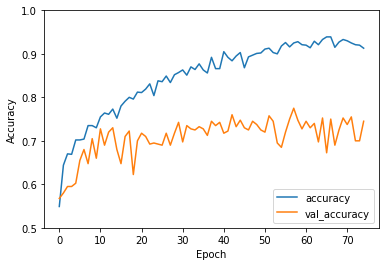

In [ ]:
plt.plot(historia.history['accuracy'], label='accuracy')
plt.plot(historia.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
import os.path

if os.path.isfile ("CvsD_CNNsModelPRO") is False:
    model.save("CvsD_CNNsModelPRO")
else:
    print("Ya existe un modelo con ese nombre")

INFO:tensorflow:Assets written to: CvsD_CNNsModelPRO/assets


In [ ]:
from tensorflow.keras.models import load_model
model = load_model ("CvsD_CNNsModelPRO")

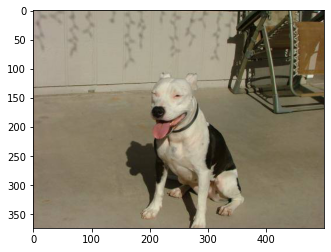

[1.8267881e-05 9.9998176e-01]
Perro


In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

from PIL import Image

#path = "/content/data/CatsvsDogs/test/cat/cat.12418.jpg"
path = "data/CatsvsDogs/test/dog/dog.11033.jpg"

image = Image.open(path)
plt.imshow(image)
plt.show()

def predict (file):
    X = load_img(file, target_size = (224,224))
    X = img_to_array(X)
    X = X/255
    X = np.expand_dims (X, axis = 0)
    arreglo = model.predict (X)
    resultado = arreglo [0]
    print(resultado)
    respuesta = np.argmax(resultado)
    return respuesta

rta = predict(path)

if rta == 0:
    print ("Gato")
else:
    print ("Perro")



Confusion Matrix, sin normalizacion
[[37 13]
 [12 38]]


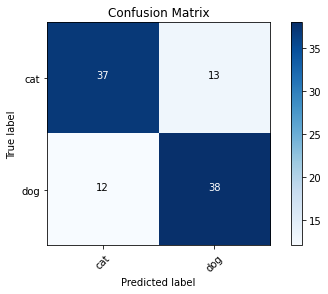

In [ ]:
predictions = model.predict(x=test_batches)
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions,axis=1))

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm_plot_labels = ["cat","dog"]

def plot_confusion_matrix (cm,classes,normalize = False, title ="Confusion Matrix",cmap = plt.cm.Blues):
    plt.imshow(cm,interpolation ="nearest",cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange (len(classes))
    plt.xticks (tick_marks, classes, rotation = 45)
    plt.yticks (tick_marks, classes)

    if normalize:
        cm = cm.astype ("float")/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion Matrix, sin normalizacion")

    print(cm)

    thresh = cm.max()/2

    for i,j in itertools.product (range(cm.shape[0]), range(cm.shape[1])):
        plt.text (j,i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i,j] > thresh else "black")

    plt.tight_layout ()
    plt.ylabel ("True label")
    plt.xlabel ("Predicted label")

plot_confusion_matrix (cm = cm, classes = cm_plot_labels, title = "Confusion Matrix")


[0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


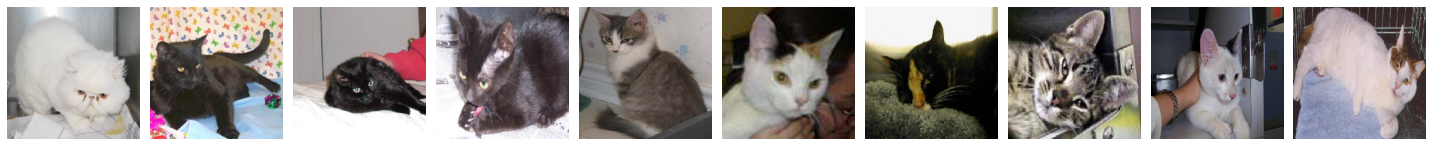

In [ ]:
print(np.argmax(predictions,axis = 1))
print(test_batches.classes)

test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)

##**Transfer Learning:**

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
modelVGG = Sequential ()
for layer in vgg16_model.layers[:-1]:
  modelVGG.add(layer) #Agregamos todas las capas del vgg16 a nuestro modelo, menos la ultima capa

for layer in modelVGG.layers:
  layer.trainable = False

modelVGG.add(Dense(2, activation = "softmax"))

modelVGG.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
modelVGG.compile(optimizer = Adam (learning_rate = 0.0001), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
modelVGG.compile(optimizer = Adam (learning_rate = 0.0001), loss = "categorical_crossentropy", metrics = ["accuracy"])

modelVGG.fit(x = train_batches, validation_data = valid_batches, epochs = 33, verbose = 2)

Epoch 1/33
100/100 - 15s - loss: 0.3924 - accuracy: 0.8410 - val_loss: 0.3815 - val_accuracy: 0.8400
Epoch 2/33
100/100 - 15s - loss: 0.3794 - accuracy: 0.8600 - val_loss: 0.3780 - val_accuracy: 0.8300
Epoch 3/33
100/100 - 15s - loss: 0.3737 - accuracy: 0.8540 - val_loss: 0.3679 - val_accuracy: 0.8525
Epoch 4/33
100/100 - 15s - loss: 0.3717 - accuracy: 0.8610 - val_loss: 0.3618 - val_accuracy: 0.8550
Epoch 5/33
100/100 - 15s - loss: 0.3604 - accuracy: 0.8640 - val_loss: 0.3596 - val_accuracy: 0.8400
Epoch 6/33
100/100 - 15s - loss: 0.3588 - accuracy: 0.8660 - val_loss: 0.3523 - val_accuracy: 0.8600
Epoch 7/33
100/100 - 15s - loss: 0.3566 - accuracy: 0.8600 - val_loss: 0.3529 - val_accuracy: 0.8525
Epoch 8/33
100/100 - 15s - loss: 0.3463 - accuracy: 0.8670 - val_loss: 0.3503 - val_accuracy: 0.8475
Epoch 9/33
100/100 - 15s - loss: 0.3397 - accuracy: 0.8600 - val_loss: 0.3435 - val_accuracy: 0.8500
Epoch 10/33
100/100 - 15s - loss: 0.3585 - accuracy: 0.8660 - val_loss: 0.3427 - val_accura

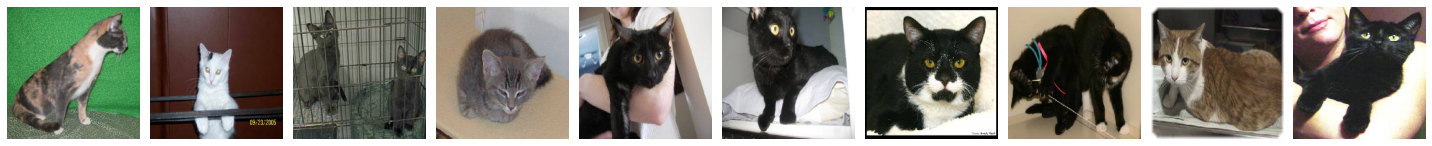

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion Matrix, sin normalizacion
[[39 11]
 [ 5 45]]


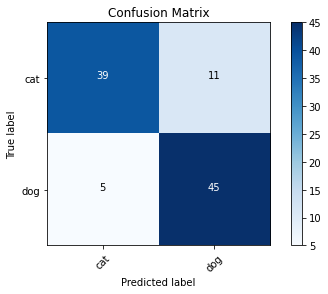

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

predictions = modelVGG.predict(x=test_batches)

cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions,axis=1))

cm_plot_labels = ["cat","dog"]

def plot_confusion_matrix (cm,classes,normalize = False, title ="Confusion Matrix",cmap = plt.cm.Blues):
    plt.imshow(cm,interpolation ="nearest",cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange (len(classes))
    plt.xticks (tick_marks, classes, rotation = 45)
    plt.yticks (tick_marks, classes)

    if normalize:
        cm = cm.astype ("float")/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion Matrix, sin normalizacion")

    print(cm)

    thresh = cm.max()/2

    for i,j in itertools.product (range(cm.shape[0]), range(cm.shape[1])):
        plt.text (j,i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i,j] > thresh else "black")

    plt.tight_layout ()
    plt.ylabel ("True label")
    plt.xlabel ("Predicted label")

plot_confusion_matrix (cm = cm, classes = cm_plot_labels, title = "Confusion Matrix")
